<a href="https://colab.research.google.com/github/Dorapower/colab-backup/blob/main/sugarcane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
p = 1/16**3 # probablity a block selected by random tick
stateN = 16 # number of sugarcane state

In [ ]:
random_tick = np.matrix(np.diag([1-p]*stateN+[1]) + np.diag([p]*stateN,-1))**3
harvest = np.matrix(np.diag([1]*stateN+[0]) + np.diag([1],stateN))

### example of instant harvest

in this circumstances, 1,15 will directly convert into 1,0 and provide a profit, which is impossible since piston don't work at random tick

In [ ]:
rtwh = np.diag([1-p]*stateN) + np.diag([p]*(stateN-1),-1) # random tick with harvest
rtwh[0,-1] = p
# probablity distribution of states
coeff = np.concatenate((rtwh-np.eye(stateN),np.array([1]*stateN).reshape(1,-1)))
P, _, _, _ = np.linalg.lstsq(coeff,np.array([0]*stateN+[1]),None) # which is a uniform distribution and is expected
# expected profit every tick
profit = P[-1] * p * 3
# expected profit over an hour
profit_insta = profit * 20 * 3600
profit_insta

3.295898437500011

### harvest with interval N ticks

2.574086395822779

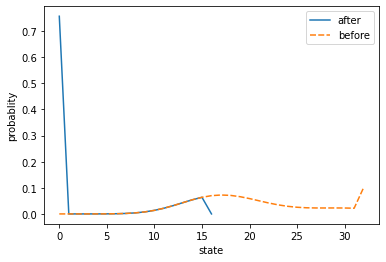

In [ ]:
#@title M Minutes Demo { run: "auto" }
minutes =  20#@param {type:"integer"}
# distribution after harvest
N = minutes*60*20
rn = random_tick**N
coeff = np.concatenate((harvest*rn-np.eye(stateN+1), np.array([[1]*(stateN+1)])),0)
P, _, _, _ = np.linalg.lstsq(coeff,np.array([0]*(stateN+1)+[1]),None)
# distruibution before harvest
Pf = np.concatenate((P[:-1],np.zeros(17)),0)  # full probablity list
Rf = np.linalg.matrix_power(np.diag([1-p]*32+[1])+np.diag([p]*32,1),3) 
Pb = np.dot(Pf,np.linalg.matrix_power(Rf,N))
# draw some fancy plot
fig = sns.lineplot(data={'after':P,'before':Pb})
fig.set(xlabel='state',ylabel='probablity')
# expected profit per tick
profit = np.sum(np.dot(Pb,np.array([0]*16+[1]*16+[2])))/N
# profit per hour
profit * 20 * 3600

Now we find the best interval

In [ ]:
def profitInterval(N):
  rn = random_tick**N
  coeff = np.concatenate((harvest*rn-np.eye(stateN+1),np.array([[1]*(stateN+1)])),0)
  P, _, _, _ = np.linalg.lstsq(coeff,np.array([0]*(stateN+1)+[1]),None)
  Pf = np.concatenate((P[:-1],np.zeros(17)),0)  # full probablity list
  Rf = np.linalg.matrix_power(np.diag([1-p]*32+[1])+np.diag([p]*32,1),3) 
  Pb = np.dot(Pf,np.linalg.matrix_power(Rf,N))
  return np.sum(np.dot(Pb,np.array([0]*16+[1]*16+[2])))/N*20*3600

[(21, 2.5763867185669698), (41, 2.592387782912192)]

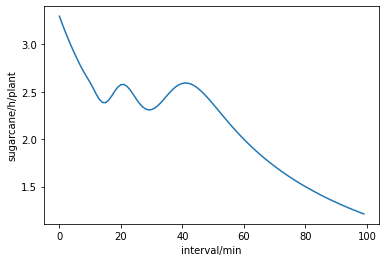

In [ ]:
profits = [profit_insta]
for minutes in range(1,100):
  N = minutes * 60 * 20
  profits.append(profitInterval(N))

fig = sns.lineplot(data=profits)
fig.set(xlabel='interval/min',ylabel='sugarcane/h/plant')

# maximizing point
pd = np.diff(profits)
[(n, profits[n]) for n in range(1, len(pd)) if pd[n]<0<pd[n-1]]

array([51.        ,  2.59239479])

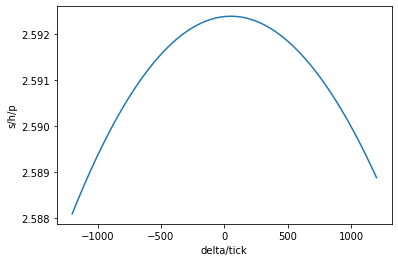

In [ ]:
profits = np.zeros((2,2400))
# maximize maximum
for delta in range(-1200,1200):
  N = 41*60*20 + delta
  profits[0][delta+1200]=delta
  profits[1][delta+1200]=profitInterval(N)
  
fig = sns.lineplot(x=profits[0],y=profits[1])
fig.set(xlabel='delta/tick',ylabel='s/h/p')
n = np.argmax(profits[1])
profits[:,n]

So we get our answer, with interval of 41 minutes and 51 ticks, with the average 2.59 sugarcane per hour per plant. Of course, as you can see in the plot, the profit will always be above 2.59(2) as long as the interval is near 41 min, so tick accurate interval is really insignificant.

In [ ]:
profits[1,n]/3600/20*1e6

36.005483231445325